#Cargo una imagen desde skimage.data

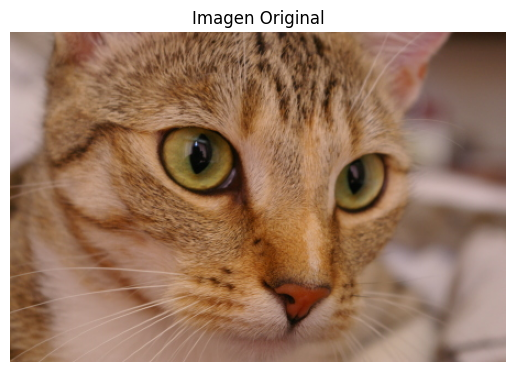

In [41]:
from skimage import data
import matplotlib.pyplot as plt

# Cargar la imagen del gato de skimage
cat_image = data.cat()

# Mostrar la imagen original
plt.imshow(cat_image)
plt.title("Imagen Original")
plt.axis('off')
plt.show()

#Importo las librerias a utilizar

In [42]:
from PIL import Image as PILImage
import skimage.color
import cv2
import numpy as np

#Algunas Funciones personales para utilizar

In [70]:
#Funcion para crear una imagen con la paleta de colores
def crear_paleta_imagen(imagen_array, num_columnas=15, tamano_cuadro=5):
    """
    Crea una imagen de la paleta de colores de una imagen (RGB o escala de grises).

    Args:
        imagen_array (numpy.ndarray): El array de la imagen.
                                      - Para RGB: (alto, ancho, 3).
                                      - Para escala de grises: (alto, ancho) o (alto, ancho, 1).
        num_columnas (int, opcional): El número de columnas en la visualización de la paleta. Defaults to 10.
        tamano_cuadro (int, opcional): El tamaño en píxeles de cada cuadro de color. Defaults to 5.

    Returns:
        numpy.ndarray: La imagen de la paleta de colores (alto, ancho, 3) para RGB
                       o (alto, ancho) para escala de grises.
    """
    if imagen_array.ndim == 3 and imagen_array.shape[2] == 3:
        colores_unicos, counts = np.unique(imagen_array.reshape(-1, 3), axis=0, return_counts=True)
        colores_ordenados = colores_unicos[np.argsort(counts)[::-1]]
        num_colores = len(colores_ordenados)
        num_filas = (num_colores + num_columnas - 1) // num_columnas
        paleta = np.full((num_filas * tamano_cuadro, num_columnas * tamano_cuadro, 3), 255, dtype=np.uint8)
        for i, color in enumerate(colores_ordenados):
            fila = i // num_columnas
            columna = i % num_columnas
            paleta[fila * tamano_cuadro:(fila + 1) * tamano_cuadro,
                   columna * tamano_cuadro:(columna + 1) * tamano_cuadro, :] = color
        return paleta
    elif imagen_array.ndim == 2 or (imagen_array.ndim == 3 and imagen_array.shape[2] == 1):
        if imagen_array.ndim == 3:
            imagen_gris = imagen_array.squeeze()
        else:
            imagen_gris = imagen_array
        tonos_unicos, counts = np.unique(imagen_gris.flatten(), return_counts=True)
        tonos_ordenados = tonos_unicos[np.argsort(counts)[::-1]]
        num_tonos = len(tonos_ordenados)
        num_filas = (num_tonos + num_columnas - 1) // num_columnas
        paleta_gris = np.full((num_filas * tamano_cuadro, num_columnas * tamano_cuadro), 255, dtype=np.uint8)
        for i, tono in enumerate(tonos_ordenados):
            fila = i // num_columnas
            columna = i % num_columnas
            paleta_gris[fila * tamano_cuadro:(fila + 1) * tamano_cuadro,
                        columna * tamano_cuadro:(columna + 1) * tamano_cuadro] = tono
        return paleta_gris
    else:
        raise ValueError("La imagen debe ser RGB o en escala de grises.")

#Funcion que devuelve los datos para mostrar los histogramas
def obtener_datos_histograma(imagen_array):
    """
    Calcula el histograma y los bins de cada canal de color de una imagen.

    Args:
        imagen_array (numpy.ndarray): El array de la imagen.
                                      - Para RGB o BGR: (alto, ancho, 3).
                                      - Para escala de grises: (alto, ancho) o (alto, ancho, 1).

    Returns:
        dict: Un diccionario donde las claves son los índices de los canales (0, 1, 2 para RGB/BGR
              o 0 para escala de grises) y los valores son diccionarios con las claves 'hist'
              (para los conteos del histograma) y 'bins' (para los bordes de los bins).
    """
    histogramas = {}
    if imagen_array.ndim == 3:
        for i in range(imagen_array.shape[2]):
            canal = imagen_array[:, :, i]
            hist, bins = np.histogram(canal.flatten(), 256, [0, 256])
            histogramas[i] = {'hist': hist, 'bins': bins[:-1]} # Excluimos el último bin
    elif imagen_array.ndim == 2 or (imagen_array.ndim == 3 and imagen_array.shape[2] == 1):
        imagen_gris = imagen_array.squeeze()
        hist, bins = np.histogram(imagen_gris.flatten(), 256, [0, 256])
        histogramas[0] = {'hist': hist, 'bins': bins[:-1]} # Excluimos el último bin
    else:
        raise ValueError("La imagen debe ser RGB, BGR o en escala de grises.")
    return histogramas

#Convierto la imagen para cada libreria

In [44]:
# Para Pillow
pil_image = PILImage.fromarray(cat_image)

# Para OpenCV (los colores en OpenCV están en formato BGR por defecto)
opencv_image = cv2.cvtColor(cat_image, cv2.COLOR_RGB2BGR)

# Para scikit-image (ya está en formato NumPy array RGB)
skimage_image = cat_image.copy()

#Comparacion de Metodos

##Conversión a escala de Grises
* Pillow: pil_gray_image = pil_image.convert('L')
* scikit-image: skimage_gray_image = skimage.color.rgb2gray(skimage_image)
* OpenCV: opencv_gray_image = cv2.cvtColor(opencv_image, cv2.COLOR_BGR2GRAY)

###Funciones Propias

In [45]:
#Funcion para convertir a gris con la media por pixel de una imagen de openCV
def convert_gray_mean(image_cv):
  h,w,c=image_cv.shape
  gris=np.zeros((h,w),dtype=np.uint8)
  for i in range(h):
    for j in range(w):
      gris[i,j]=np.int8(np.mean(image_cv[i,j]))
  return gris

#Funcion para convertir a gris con el maximo por pixel de una imagen de openCV
def convert_gray_max(image_cv):
  h,w,c=image_cv.shape
  gris=np.zeros((h,w),dtype=np.uint8)
  for i in range(h):
    for j in range(w):
      gris[i,j]=np.max(image_cv[i,j])
  return gris




##Comparacion

In [46]:
#Metodos predefinidos
pil_gray_image = pil_image.convert('L')
skimage_gray_image = skimage.color.rgb2gray(skimage_image)
opencv_gray_image = cv2.cvtColor(opencv_image, cv2.COLOR_BGR2GRAY)

#Funciones Propias
gris_mean=convert_gray_mean(opencv_image)
gris_max=convert_gray_max(opencv_image)

#Convierto a numpy los otros formatos de imagen
pil_gray_array = np.array(pil_gray_image) #Para pil
skimage_gray_array = (skimage_gray_image * 255).astype(np.uint8) # Convertir a uint8 para la paleta


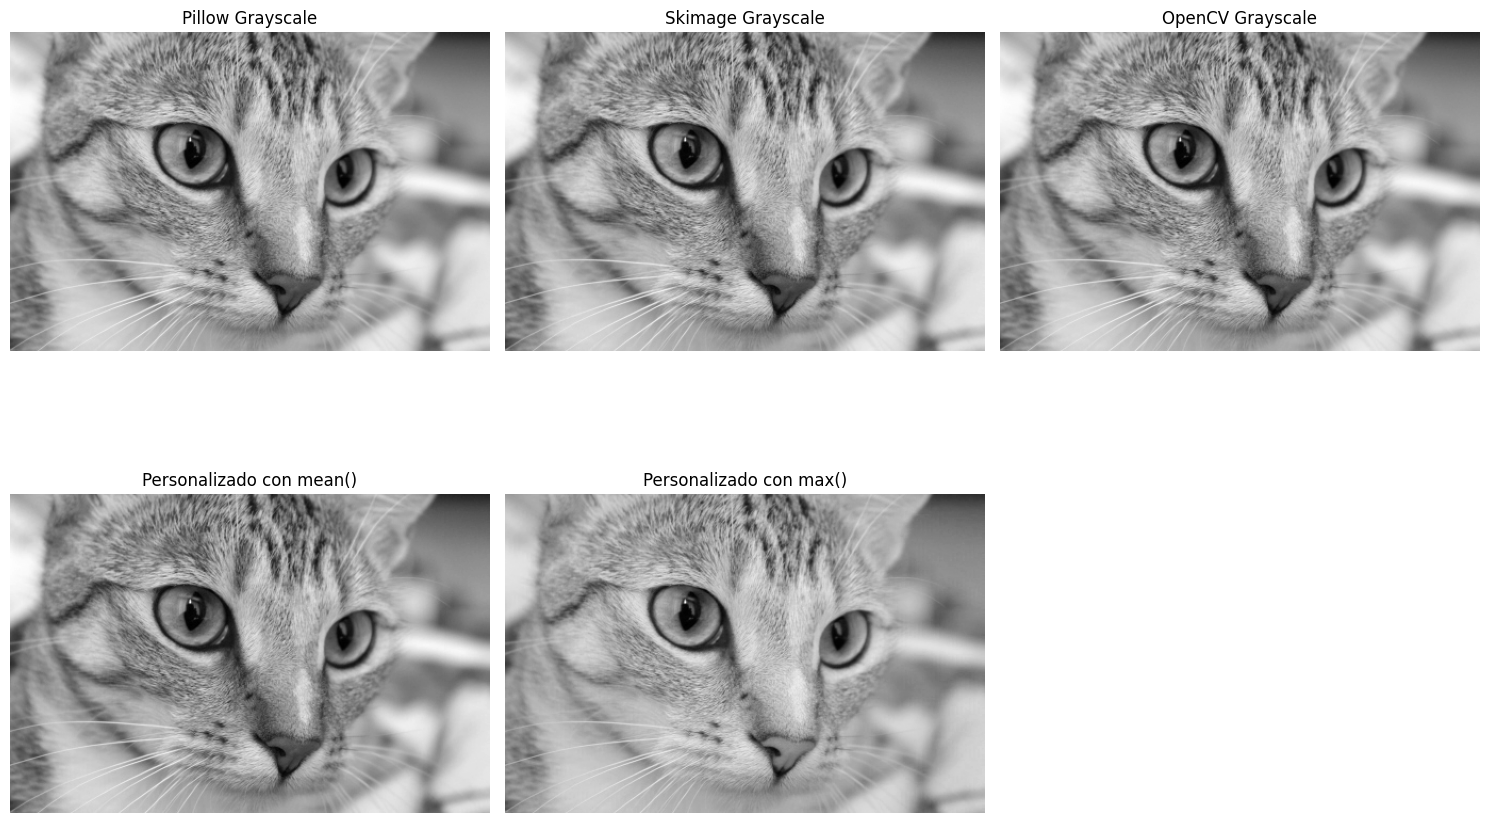

In [47]:
#Muestro las imagenes
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.imshow(pil_gray_array, cmap='gray')
plt.title("Pillow Grayscale")
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(skimage_gray_array, cmap='gray')
plt.title("Skimage Grayscale")
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(opencv_gray_image, cmap='gray')
plt.title("OpenCV Grayscale")
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(gris_mean, cmap='gray')
plt.title("Personalizado con mean()")
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(gris_max, cmap='gray')
plt.title("Personalizado con max()")
plt.axis('off')


plt.tight_layout()
plt.show()

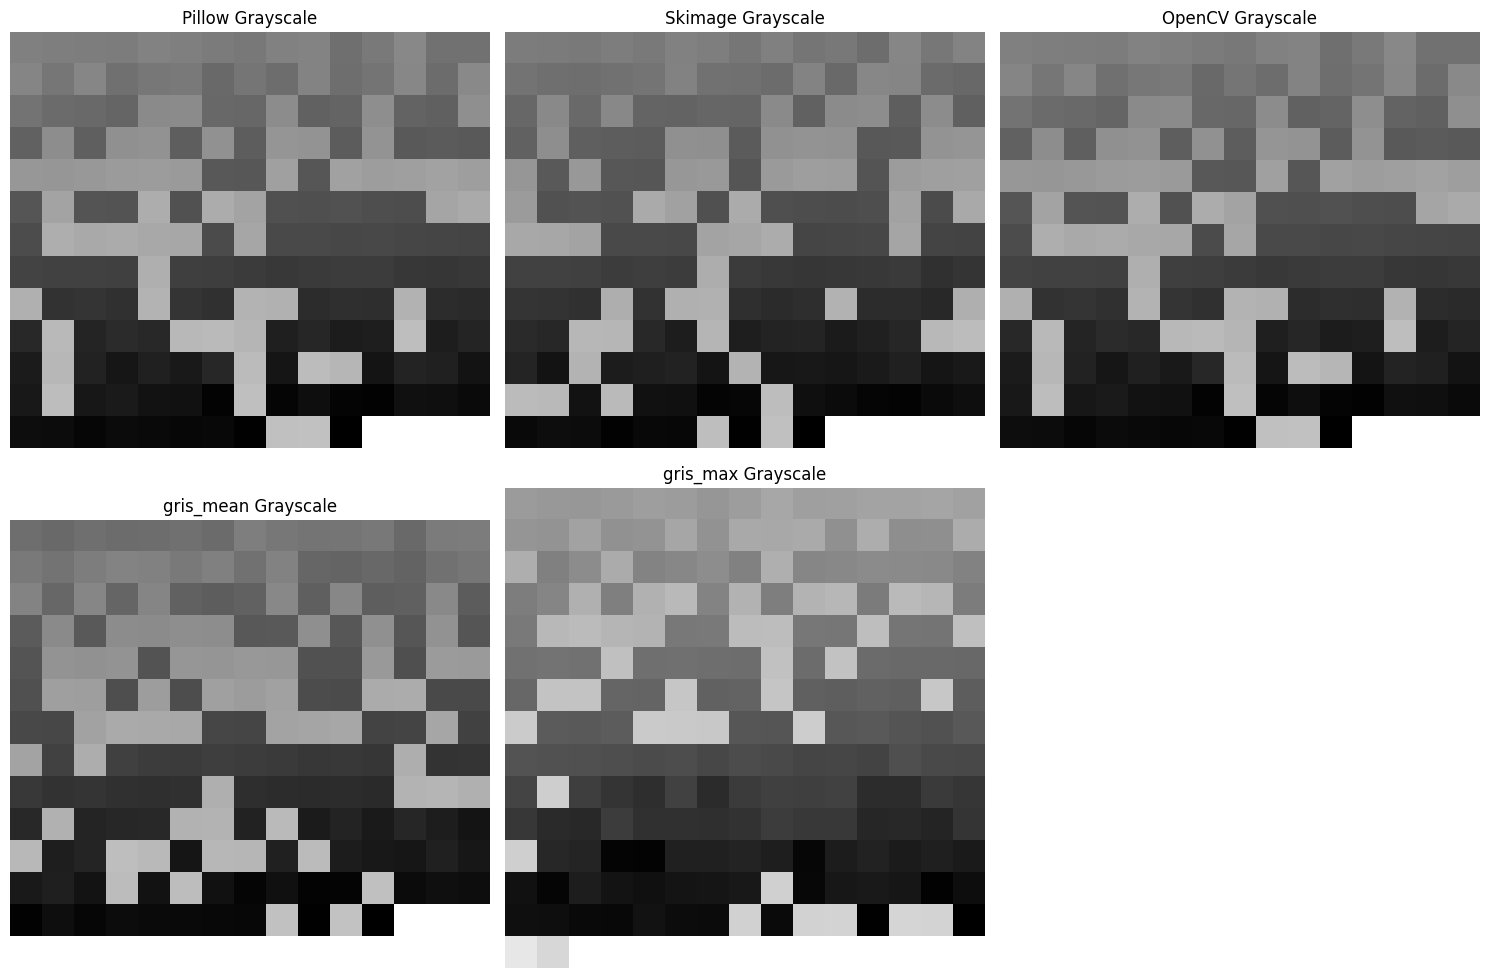

In [71]:
#Muestro las paletas
fig, axes = plt.subplots(2, 3, figsize=(15, 10)) # Crea una figura y un array de 3 ejes

# Paleta de Pillow Grayscale
paleta_pil_gris = crear_paleta_imagen(pil_gray_array[:, :, np.newaxis])
axes[0,0].imshow(paleta_pil_gris, cmap='gray')
axes[0,0].set_title("Pillow Grayscale")
axes[0,0].axis('off')

# Paleta de Skimage Grayscale
paleta_skimage_gris = crear_paleta_imagen(skimage_gray_array[:, :, np.newaxis])
axes[0,1].imshow(paleta_skimage_gris, cmap='gray')
axes[0,1].set_title("Skimage Grayscale")
axes[0,1].axis('off')

# Paleta de OpenCV Grayscale
paleta_opencv_gris = crear_paleta_imagen(opencv_gray_image[:, :, np.newaxis])
axes[0,2].imshow(paleta_opencv_gris, cmap='gray')
axes[0,2].set_title("OpenCV Grayscale")
axes[0,2].axis('off')

# Paleta de gris_mean
paleta_gris_mean = crear_paleta_imagen(gris_mean[:, :, np.newaxis])
axes[1,0].imshow(paleta_gris_mean, cmap='gray')
axes[1,0].set_title("gris_mean Grayscale")
axes[1,0].axis('off')

# Paleta de gris_max
paleta_gris_max = crear_paleta_imagen(gris_max[:, :, np.newaxis])
axes[1,1].imshow(paleta_gris_max, cmap='gray')
axes[1,1].set_title("gris_max Grayscale")
axes[1,1].axis('off')
axes[1,2].axis('off')

plt.tight_layout()
plt.show()

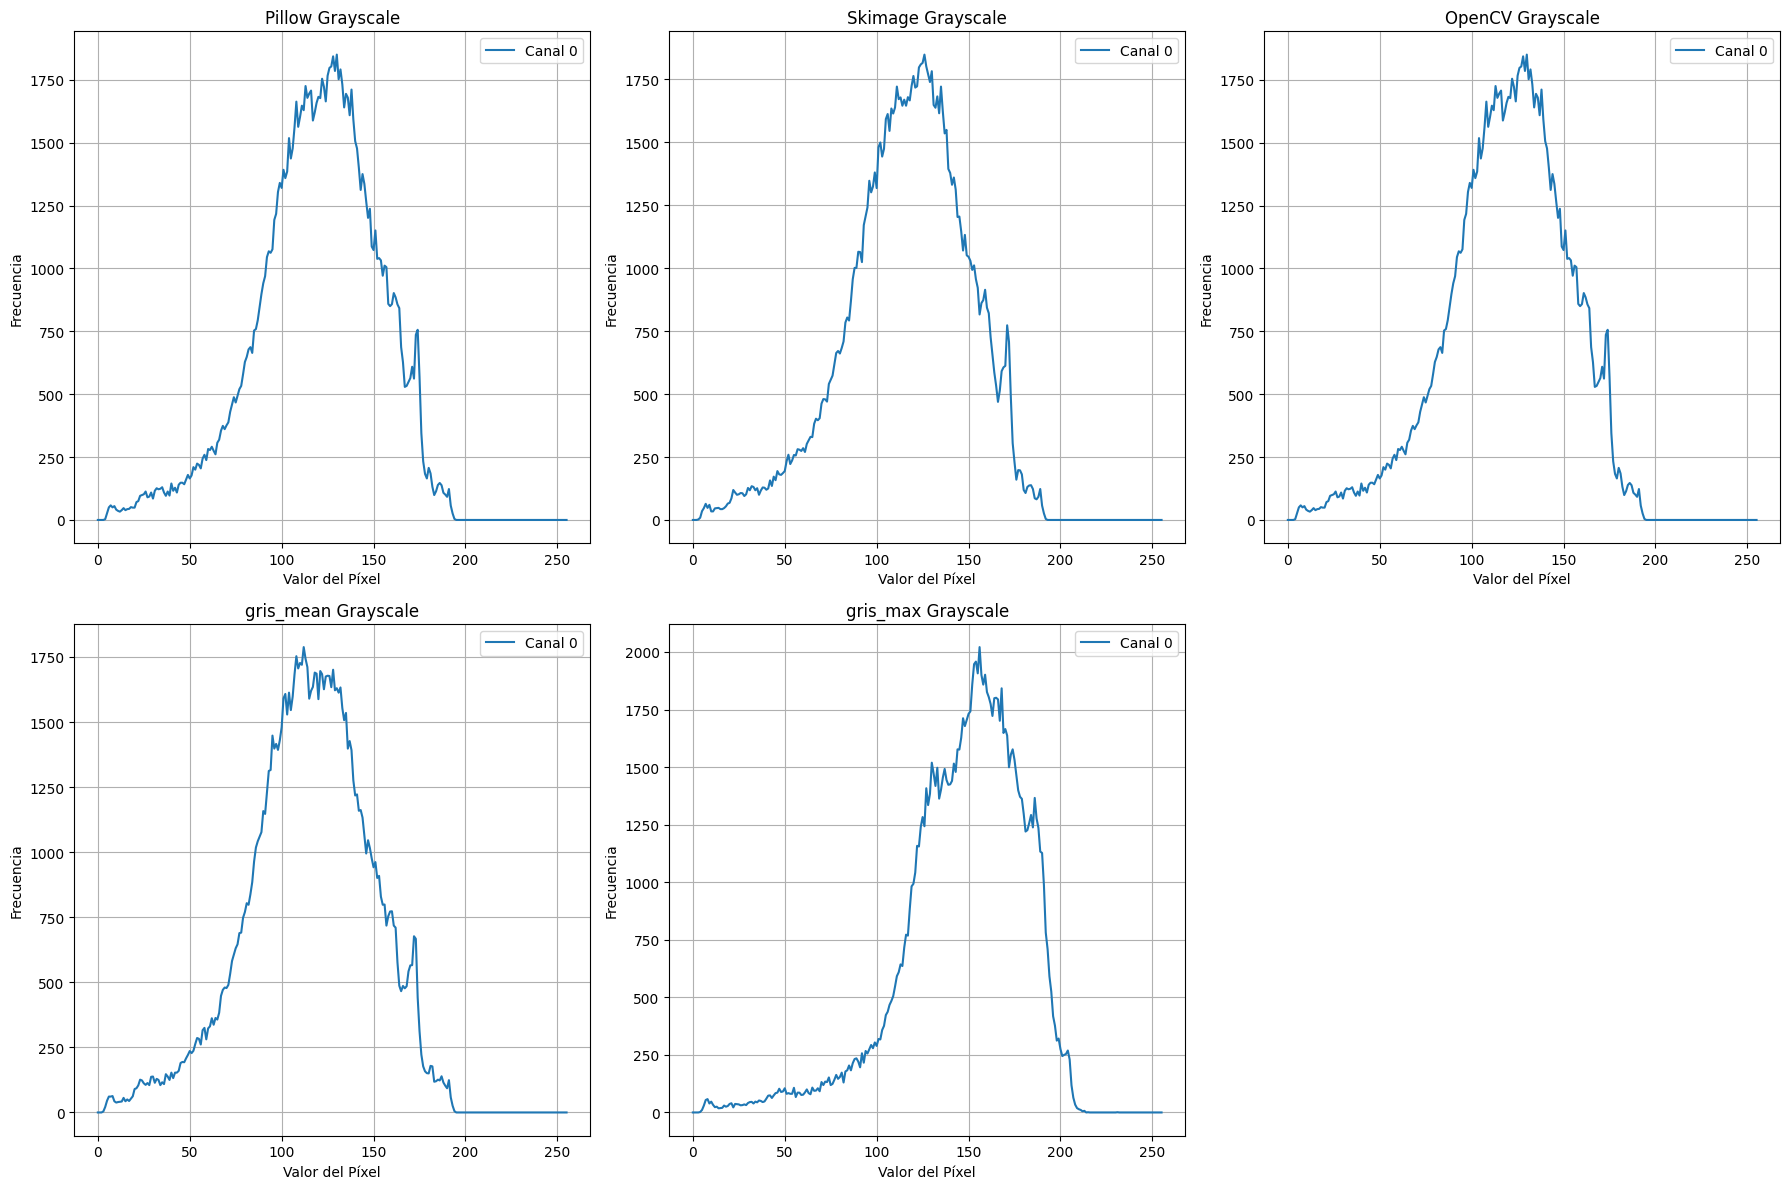

In [49]:
#Muestro los histogramas
# Obtener los datos de los histogramas
histograma_pil_gris = obtener_datos_histograma(pil_gray_array)
histograma_skimage_gris = obtener_datos_histograma(skimage_gray_array)
histograma_opencv_gris = obtener_datos_histograma(opencv_gray_image)
histograma_gris_mean = obtener_datos_histograma(gris_mean)
histograma_gris_max = obtener_datos_histograma(gris_max)

# Crear la figura y los subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12)) # Ajustamos el tamaño de la figura para que quepan los histogramas

# Graficar el histograma de Pillow Grayscale
ax = axes[0,0]
for canal_index, data in histograma_pil_gris.items():
    ax.plot(data['bins'], data['hist'], label=f"Canal {canal_index}")
ax.set_title("Pillow Grayscale")
ax.set_xlabel("Valor del Píxel")
ax.set_ylabel("Frecuencia")
ax.legend()
ax.grid(True)

# Graficar el histograma de Skimage Grayscale
ax = axes[0,1]
for canal_index, data in histograma_skimage_gris.items():
    ax.plot(data['bins'], data['hist'], label=f"Canal {canal_index}")
ax.set_title("Skimage Grayscale")
ax.set_xlabel("Valor del Píxel")
ax.set_ylabel("Frecuencia")
ax.legend()
ax.grid(True)

# Graficar el histograma de OpenCV Grayscale
ax = axes[0,2]
for canal_index, data in histograma_opencv_gris.items():
    ax.plot(data['bins'], data['hist'], label=f"Canal {canal_index}")
ax.set_title("OpenCV Grayscale")
ax.set_xlabel("Valor del Píxel")
ax.set_ylabel("Frecuencia")
ax.legend()
ax.grid(True)

# Graficar el histograma de gris_mean
ax = axes[1,0]
for canal_index, data in histograma_gris_mean.items():
    ax.plot(data['bins'], data['hist'], label=f"Canal {canal_index}")
ax.set_title("gris_mean Grayscale")
ax.set_xlabel("Valor del Píxel")
ax.set_ylabel("Frecuencia")
ax.legend()
ax.grid(True)

# Graficar el histograma de gris_max
ax = axes[1,1]
for canal_index, data in histograma_gris_max.items():
    ax.plot(data['bins'], data['hist'], label=f"Canal {canal_index}")
ax.set_title("gris_max Grayscale")
ax.set_xlabel("Valor del Píxel")
ax.set_ylabel("Frecuencia")
ax.legend()
ax.grid(True)

ax = axes[1,2]
ax.grid(False)
ax.axis('off')

plt.tight_layout()
plt.show()

##Cuantizacion

###Funciones personalizadas
* **cuantizacion_round_opencv:**
Calcula un factor dividiendo el rango de valores de píxeles (0-255) por el número de colores deseado menos 1. Esto crea un conjunto de "pasos" para la cuantización.
Divide cada canal de la imagen por este factor, redondea el resultado al entero más cercano y luego multiplica de nuevo por el factor. Esto fuerza los valores de los píxeles a los niveles definidos por el número de colores.
Finalmente, convierte la imagen de nuevo a np.uint8.
* **cuantizacion_floor_opencv:**
Funciona de manera similar a la anterior, pero en lugar de redondear, utiliza la función np.floor para tomar la parte entera inferior de la división. Esto también fuerza los valores de los píxeles a los niveles definidos, pero con un sesgo hacia los valores inferiores del rango.
* **cuantizacion_kmeans_personalizado_opencv:**
Remodela la imagen BGR en una lista de píxeles (cada píxel es un array de 3 valores).
Utiliza la función cv2.kmeans de OpenCV para agrupar estos píxeles en nro_colores clusters basándose en la similitud de sus valores de color.
Los centroides resultantes son los valores promedio de los colores en cada cluster.
Las etiquetas indican a qué cluster pertenece cada píxel original.
Finalmente, crea una nueva imagen donde el color de cada píxel se reemplaza por el color del centroide de su cluster correspondiente.

In [62]:
from sklearn.neighbors import NearestNeighbors

#Cauntizacion por round()
def cuantizacion_round_opencv(imagen_bgr, nro_colores):
    """
    Realiza la cuantización de una imagen BGR utilizando el valor redondeado.

    Args:
        imagen_bgr (numpy.ndarray): La imagen en formato BGR (alto, ancho, 3).
        nro_colores (int): El número de colores deseado por canal.

    Returns:
        numpy.ndarray: La imagen cuantizada en formato BGR (alto, ancho, 3).
    """
    factor = 255 / (nro_colores - 1) if nro_colores > 1 else 0
    imagen_cuantizada = np.round(imagen_bgr / factor) * factor
    return imagen_cuantizada.astype(np.uint8)

#Cuantizacion por floor()
def cuantizacion_floor_opencv(imagen_bgr, nro_colores):
    """
    Realiza la cuantización de una imagen BGR utilizando la función floor.

    Args:
        imagen_bgr (numpy.ndarray): La imagen en formato BGR (alto, ancho, 3).
        nro_colores (int): El número de colores deseado por canal.

    Returns:
        numpy.ndarray: La imagen cuantizada en formato BGR (alto, ancho, 3).
    """
    factor = 255 / (nro_colores - 1) if nro_colores > 1 else 0
    imagen_cuantizada = np.floor(imagen_bgr / factor) * factor
    return imagen_cuantizada.astype(np.uint8)

from sklearn.cluster import KMeans

def reducir_colores_por_kmeans(imagen_bgr, nro_colores):
    """
    Agrupa los colores de una imagen en N clusters por cercanía en el espacio BGR,
    calcula la media de cada cluster, y reemplaza los colores originales por esas medias.

    Parámetros:
    img: np.ndarray -> Imagen en formato BGR.
    n_clusters: int -> Número de clusters de color a crear.

    Retorna:
    np.ndarray -> Imagen resultante con los colores agrupados y reemplazados por sus medias.
    """
    # Obtener las dimensiones
    h, w, c = imagen_bgr.shape

    # Aplanar la imagen a una lista de píxeles (cada uno con 3 valores BGR)
    pixels = imagen_bgr.reshape((-1, 3))

    # Aplicar KMeans clustering
    kmeans = KMeans(n_clusters=nro_colores, n_init='auto')
    labels = kmeans.fit_predict(pixels)

    # Calcular la media de cada cluster
    means = np.zeros((nro_colores, 3), dtype=np.uint8)
    for i in range(nro_colores):
        cluster_pixels = pixels[labels == i]
        if len(cluster_pixels) > 0:
            means[i] = np.mean(cluster_pixels, axis=0)

    # Reemplazar cada píxel por la media de su cluster
    result_pixels = np.array([means[label] for label in labels], dtype=np.uint8)

    # Reconstruir la imagen original
    result_img = result_pixels.reshape((h, w, 3))

    return result_img

###Comparacion


--- Nivel de Cuantización por canal: 32 ---

--- Nivel de Cuantización por canal: 16 ---

--- Nivel de Cuantización por canal: 8 ---

--- Nivel de Cuantización por canal: 4 ---

--- Nivel de Cuantización por canal: 2 ---

--- Visualizaciones para Nivel de Cuantización: 32 ---


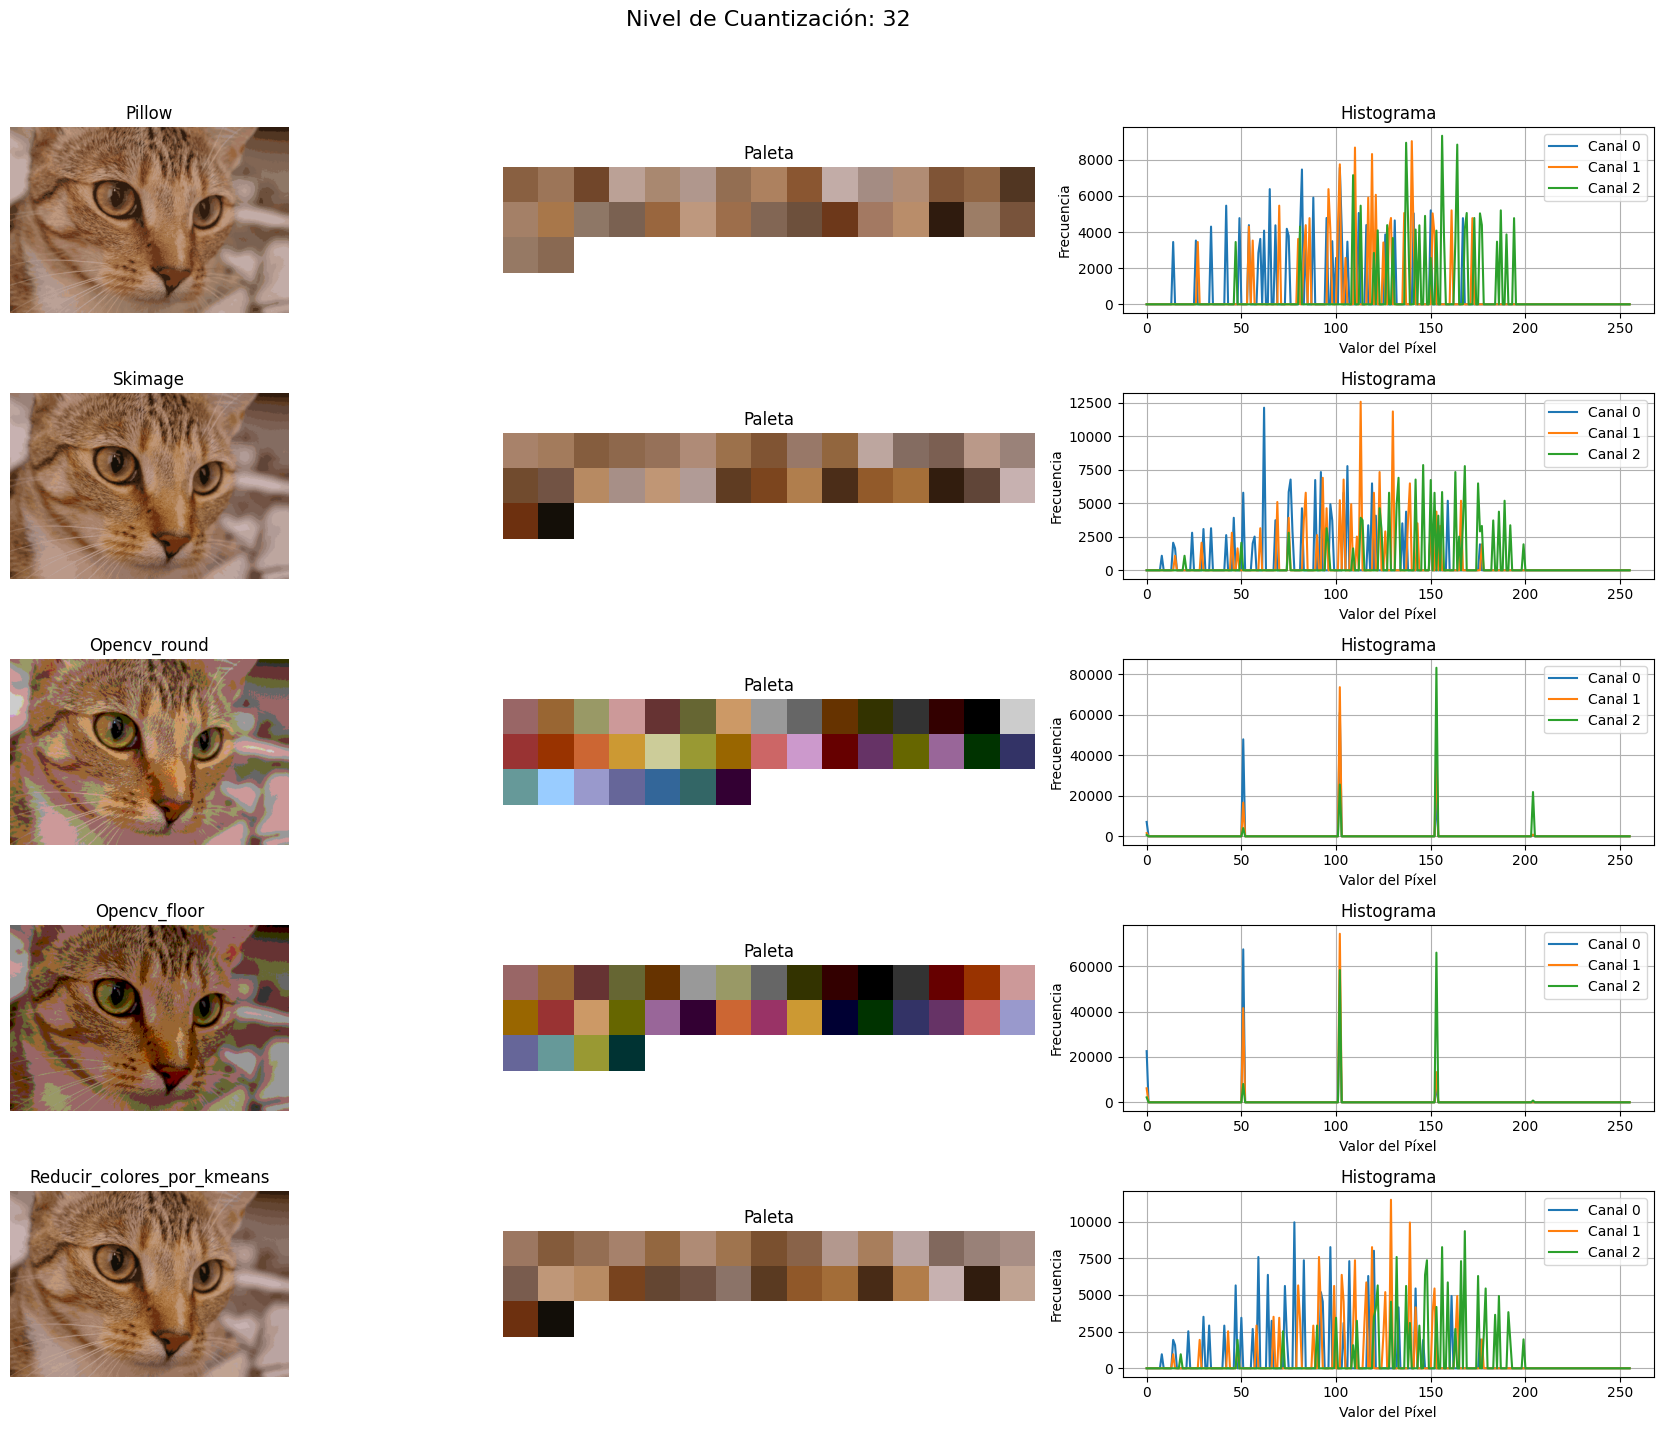


--- Visualizaciones para Nivel de Cuantización: 16 ---


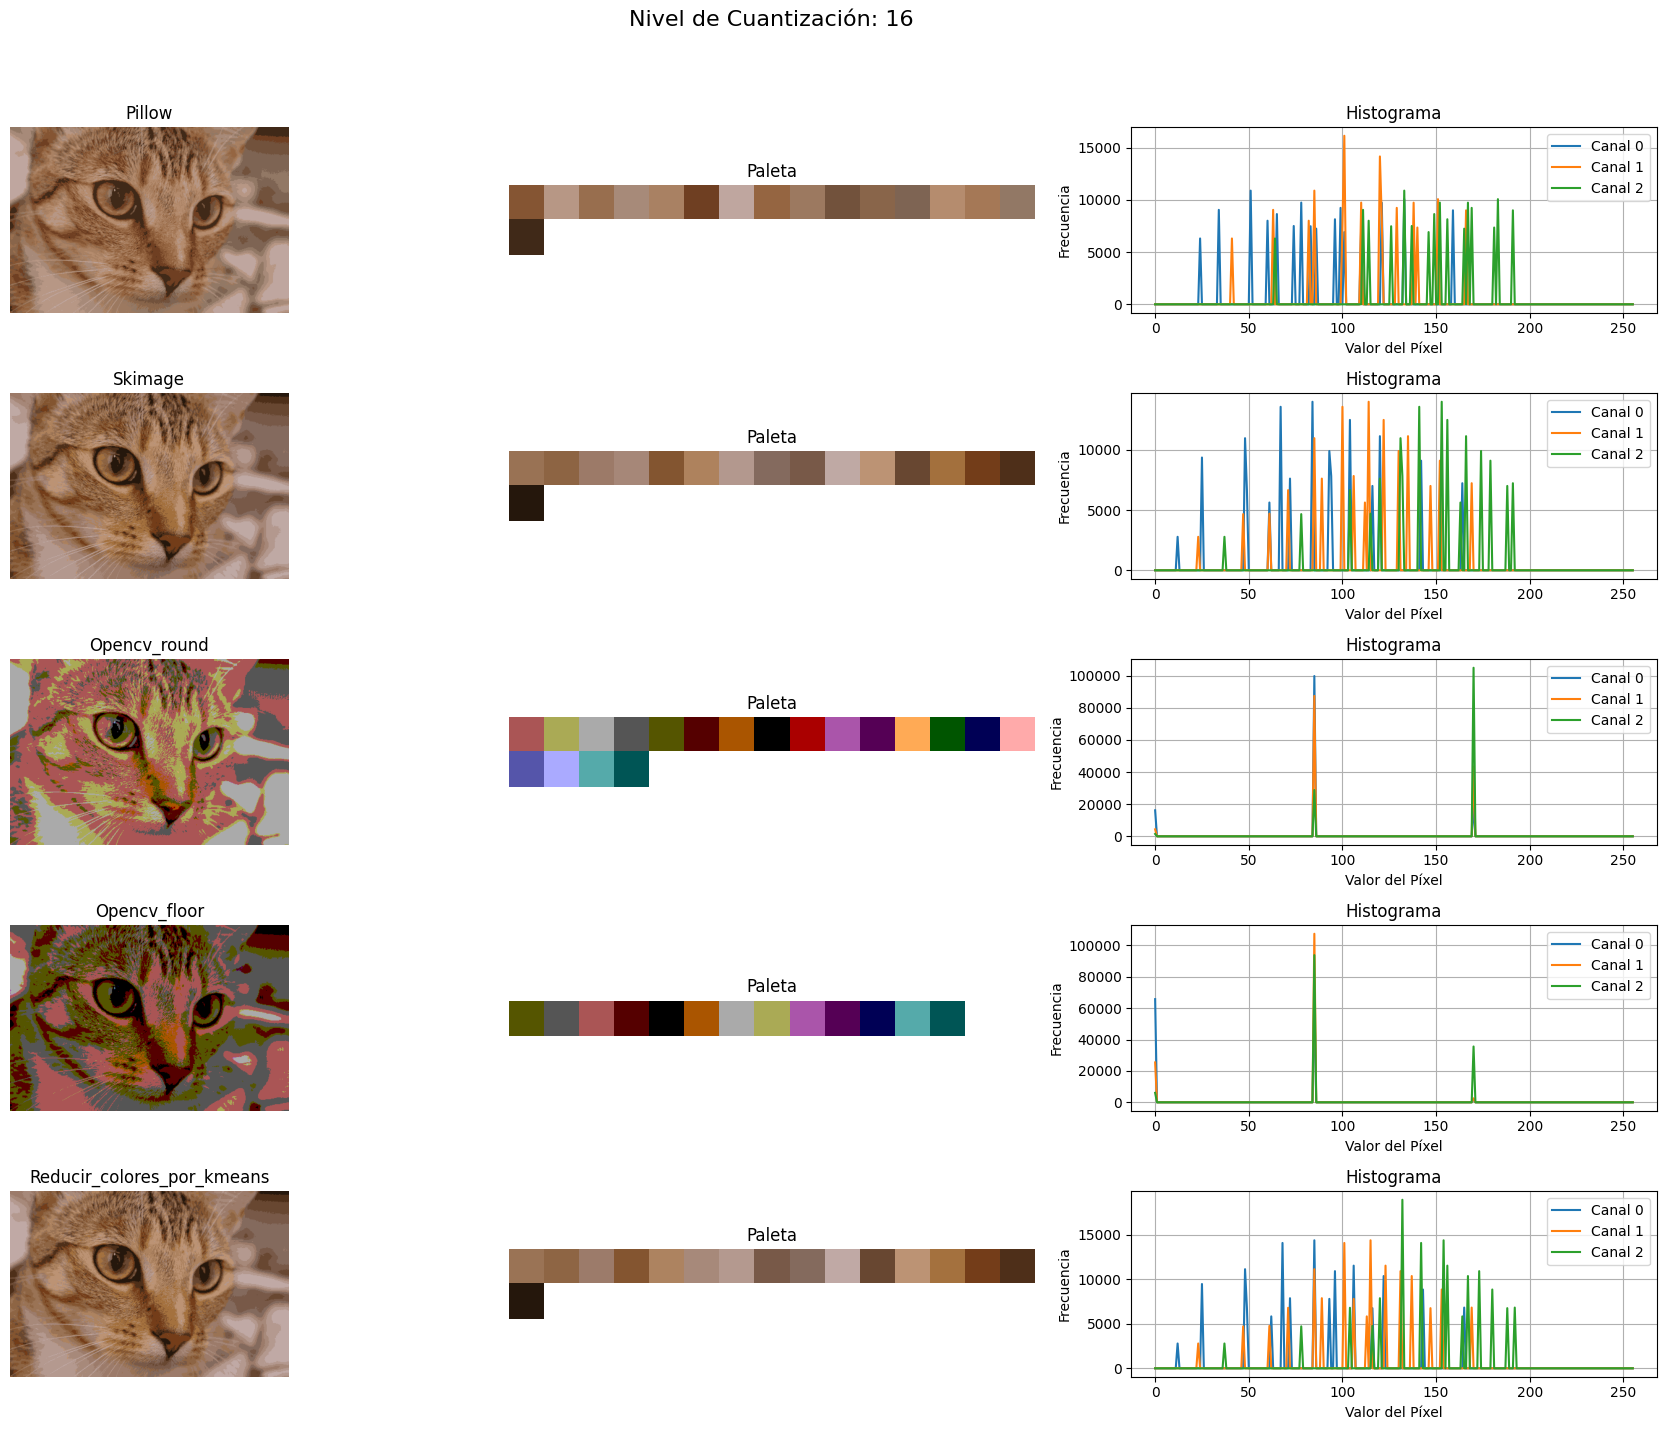


--- Visualizaciones para Nivel de Cuantización: 8 ---


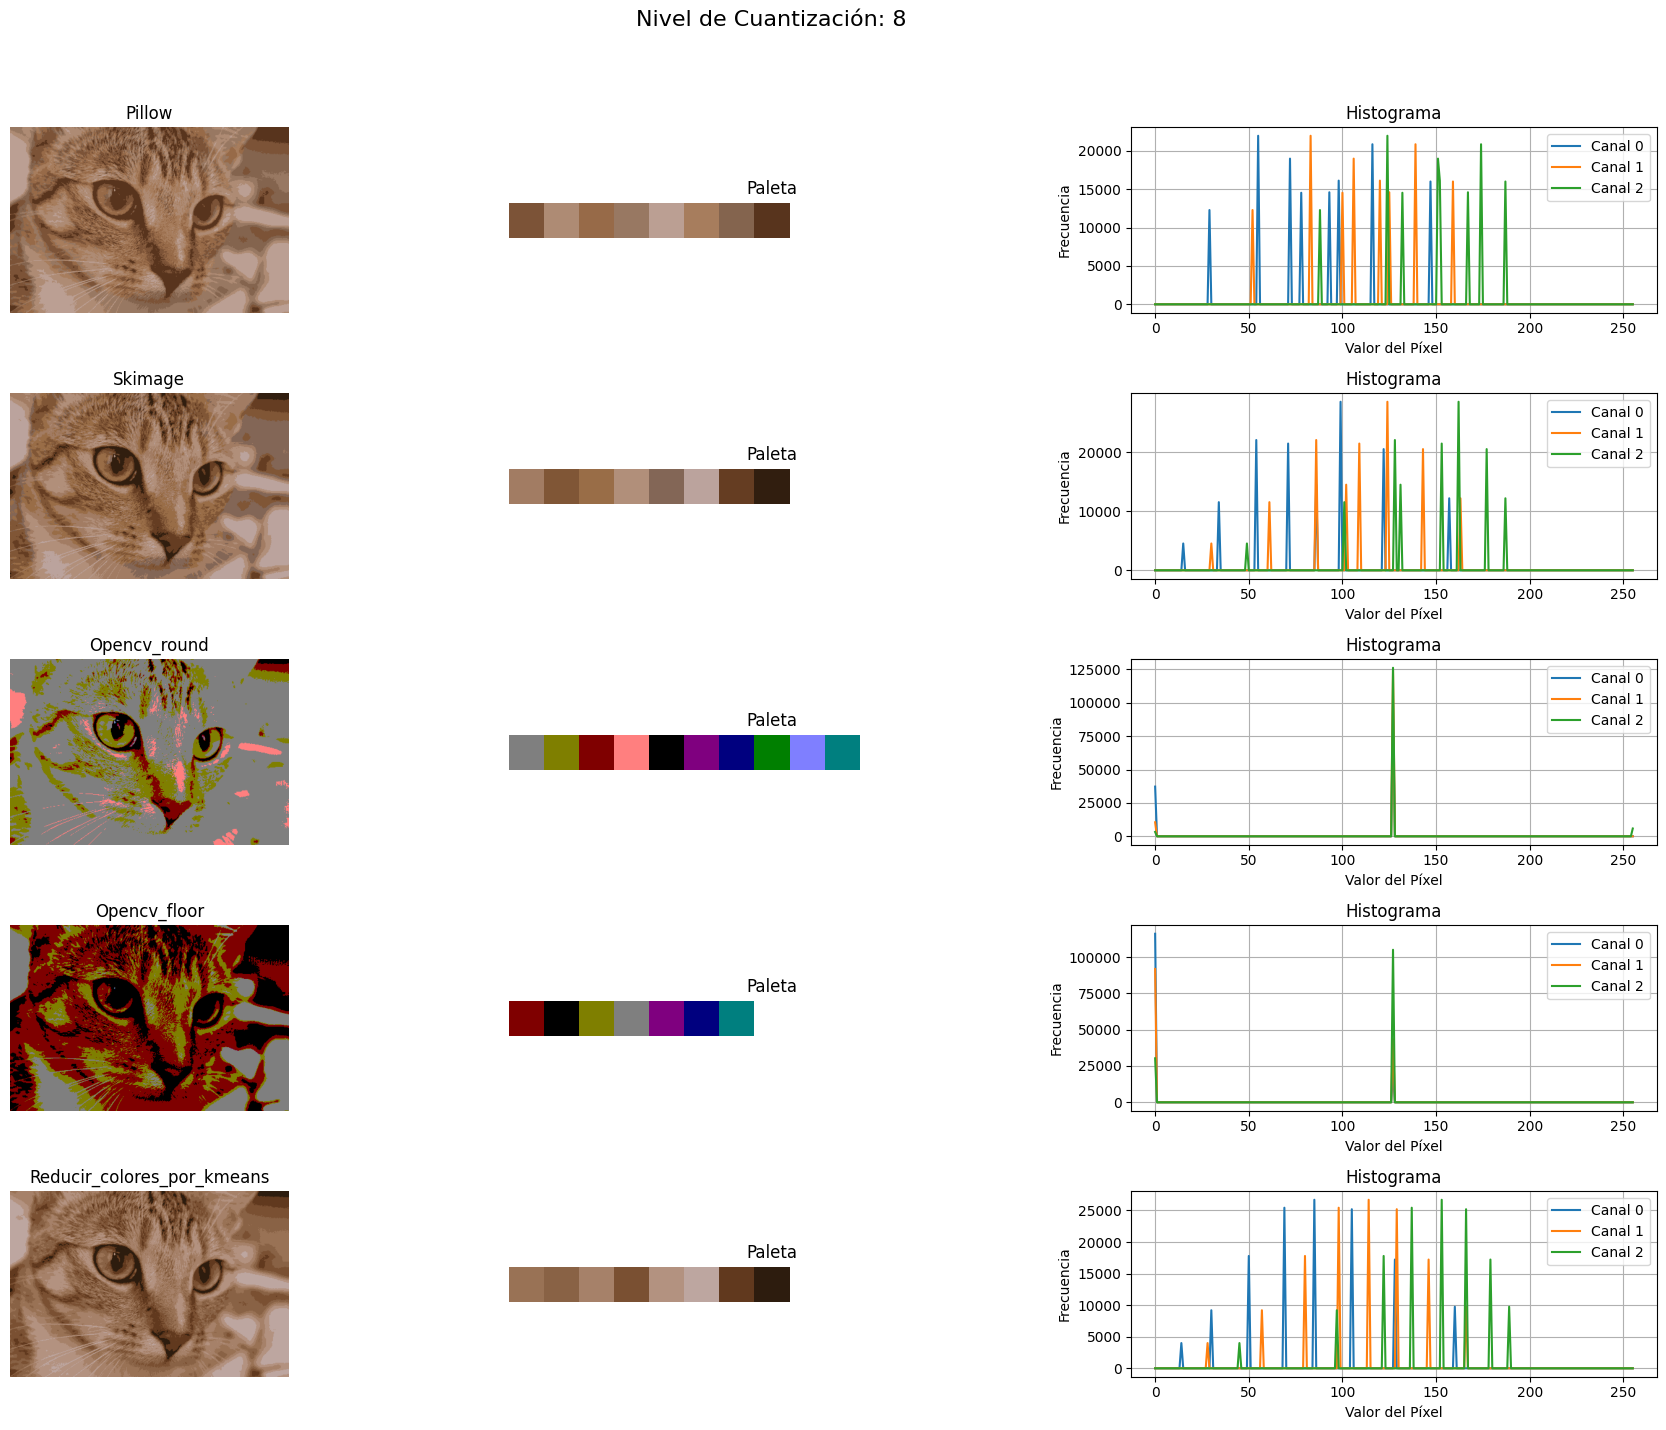


--- Visualizaciones para Nivel de Cuantización: 4 ---


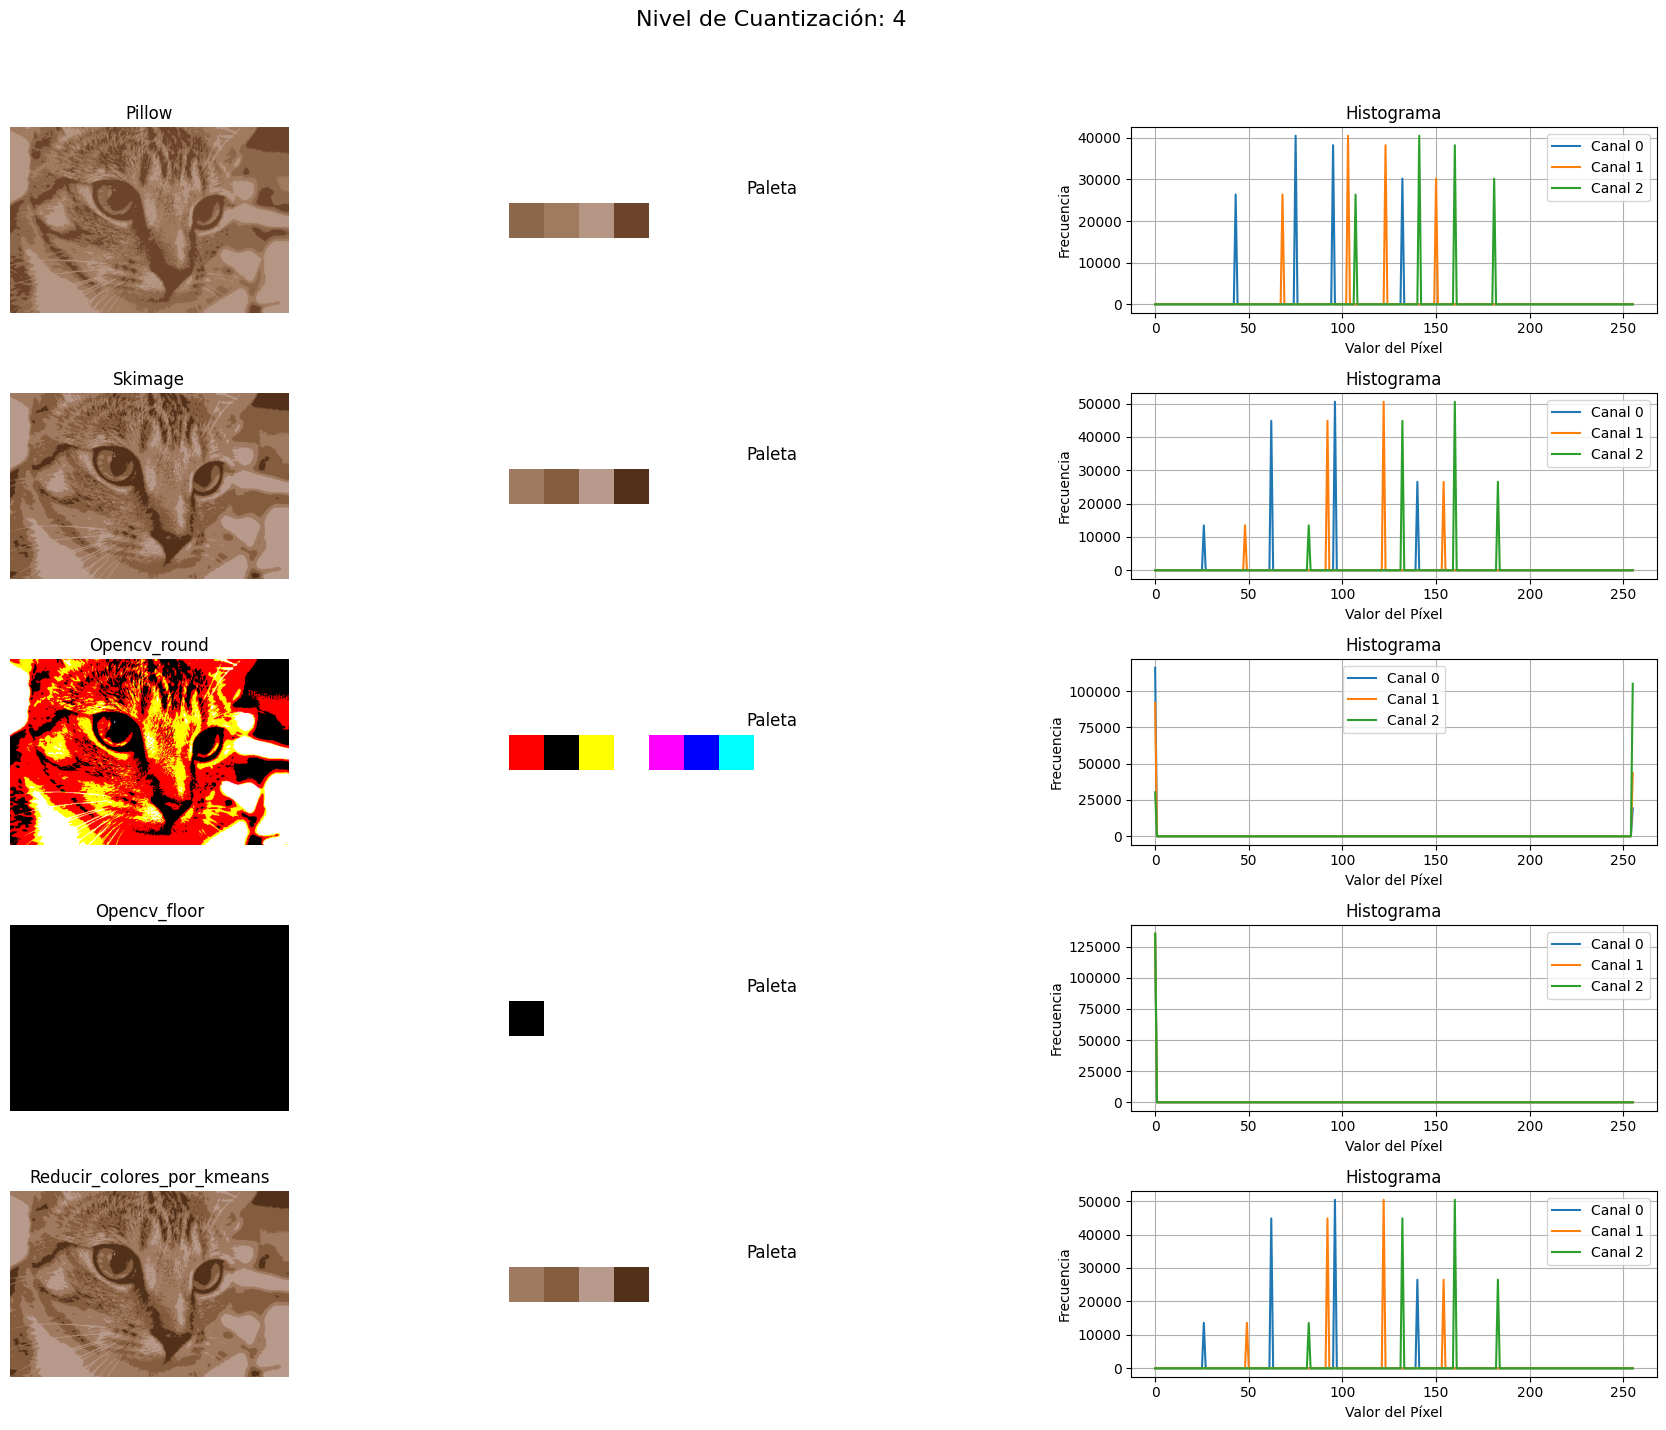


--- Visualizaciones para Nivel de Cuantización: 2 ---


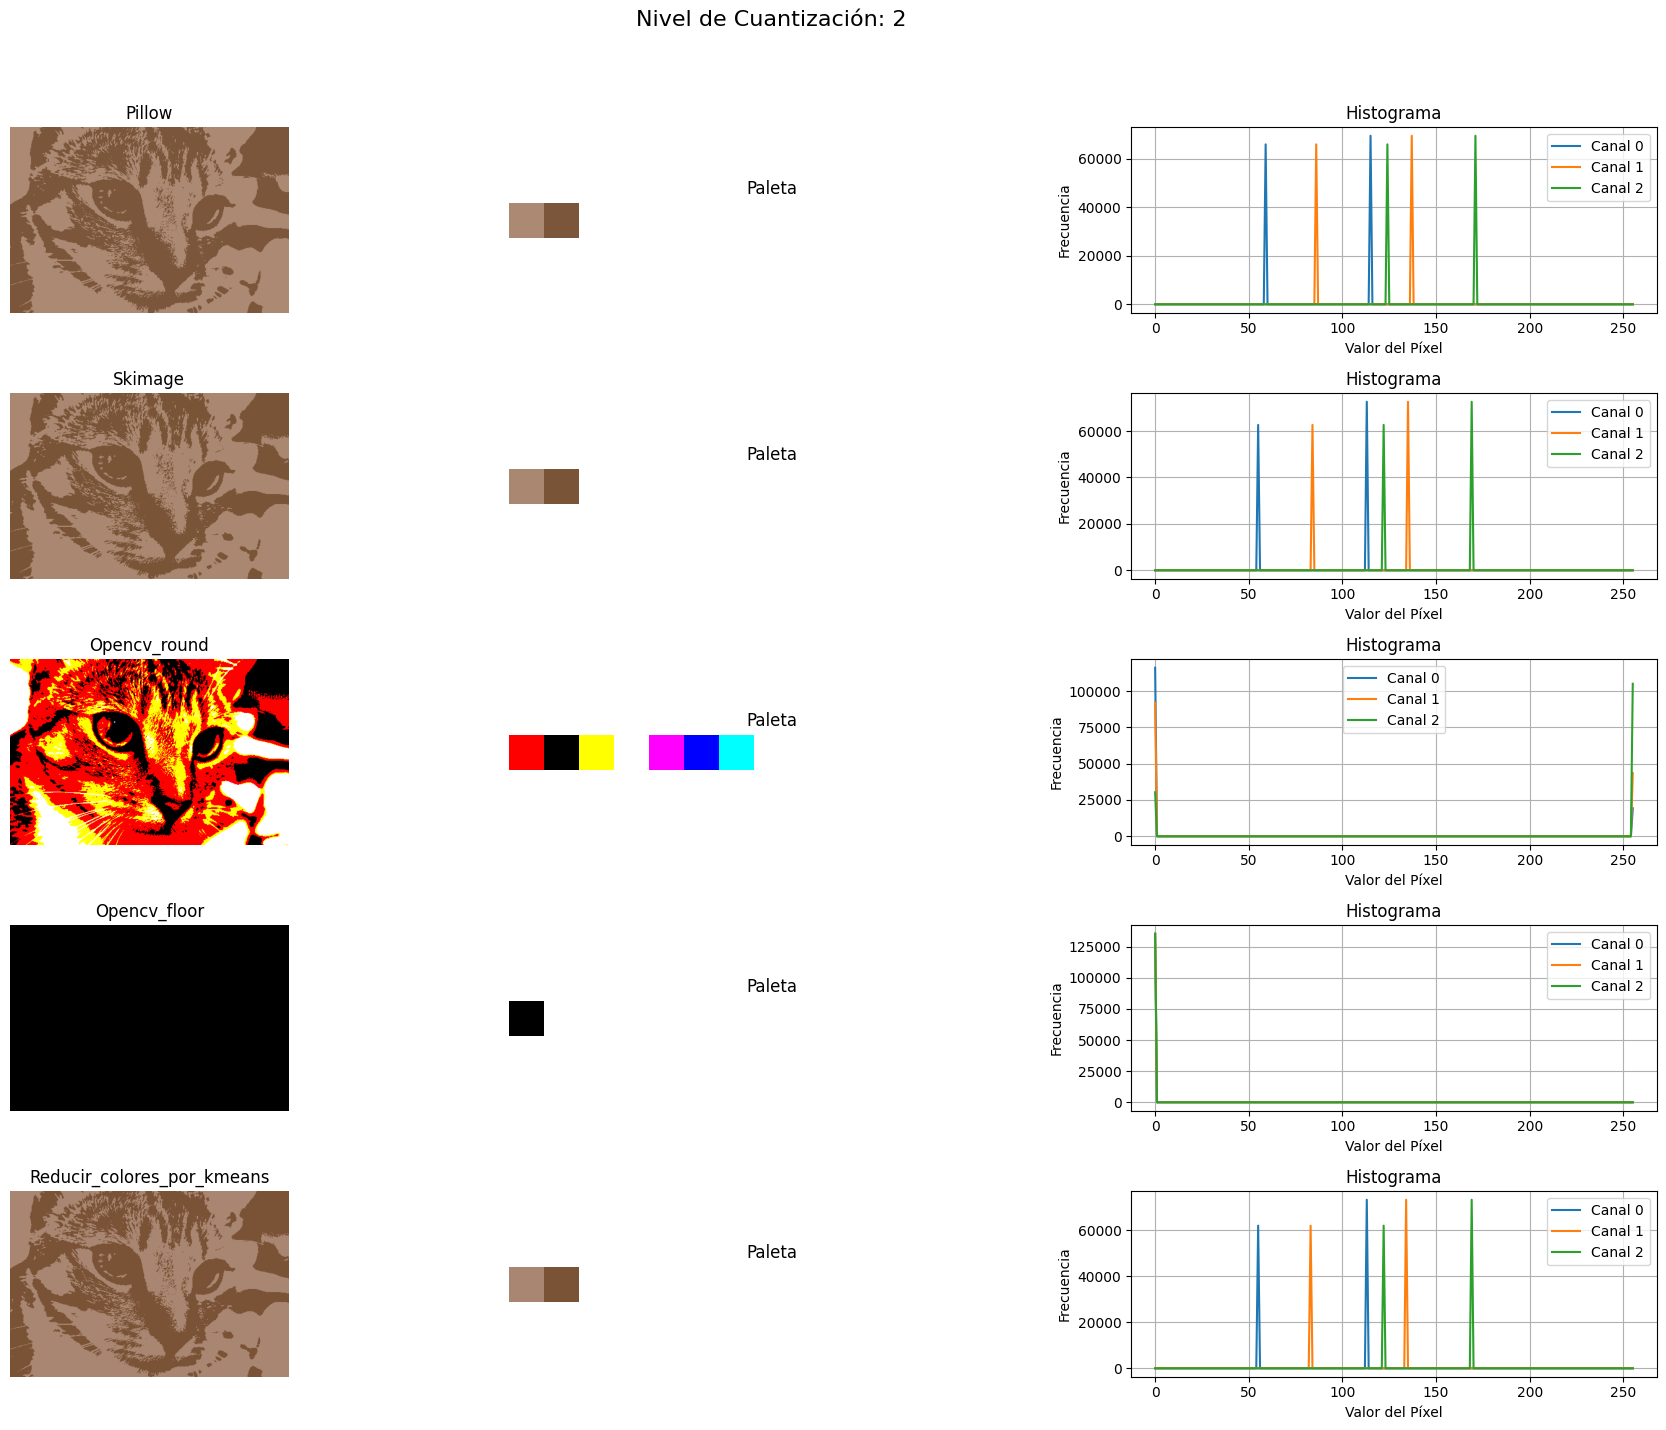

In [84]:
niveles_cuantizacion = [32, 16, 8, 4, 2]

#Importo Kmeans
from sklearn.cluster import KMeans
import math

imagenes_cuantizadas = {nivel: {} for nivel in niveles_cuantizacion}

for nivel in niveles_cuantizacion:
    print(f"\n--- Nivel de Cuantización por canal: {nivel} ---")

    # Pillow
    imagen_pil = PILImage.fromarray(cat_image)
    imagenes_cuantizadas[nivel]['pillow'] = np.array(imagen_pil.quantize(colors=nivel).convert("RGB"))


    # Skimage (Clustering de Colores)
    pixels = cat_image.reshape(-1, 3).astype(float)
    kmeans_skimage = KMeans(n_clusters=nivel, random_state=0, n_init=10)
    kmeans_skimage.fit(pixels)
    nuevos_colores_skimage = kmeans_skimage.cluster_centers_.astype("uint8")
    etiquetas_skimage = kmeans_skimage.predict(pixels)
    imagenes_cuantizadas[nivel]['skimage'] = nuevos_colores_skimage[etiquetas_skimage].reshape(cat_image.shape).astype("uint8")

    #Convierto la imagen a RGB
    tonos=math.ceil(nivel**(1/2))
    imagen_rgb = cv2.cvtColor(opencv_image, cv2.COLOR_BGR2RGB)

    # OpenCV Round
    imagenes_cuantizadas[nivel]['opencv_round'] = cuantizacion_round_opencv(imagen_rgb.copy(), tonos)

    # OpenCV Floor
    imagenes_cuantizadas[nivel]['opencv_floor'] = cuantizacion_floor_opencv(imagen_rgb.copy(), tonos)

    # OpenCV Vecinos
    imagenes_cuantizadas[nivel]['reducir_colores_por_kmeans'] = reducir_colores_por_kmeans(imagen_rgb.copy(),nivel)

# Visualizaciones
for nivel, resultados_nivel in imagenes_cuantizadas.items():
    print(f"\n--- Visualizaciones para Nivel de Cuantización: {nivel} ---")
    fig, axes = plt.subplots(5, 3, figsize=(18, 15))
    fig.suptitle(f"Nivel de Cuantización: {nivel}", fontsize=16)

    metodos = ['pillow', 'skimage', 'opencv_round', 'opencv_floor', 'reducir_colores_por_kmeans']
    for i, metodo in enumerate(metodos):
        imagen = resultados_nivel[metodo]

        # Imagen
        axes[i, 0].imshow(imagen)
        axes[i, 0].set_title(metodo.capitalize())
        axes[i, 0].axis('off')

        # Paleta
        paleta = crear_paleta_imagen(imagen)
        axes[i, 1].imshow(paleta)
        axes[i, 1].set_title("Paleta")
        axes[i, 1].axis('off')

        # Histograma
        histograma = obtener_datos_histograma(cv2.cvtColor(imagen, cv2.COLOR_RGB2BGR))
        for canal, data in histograma.items():
            axes[i, 2].plot(data['bins'], data['hist'], label=f"Canal {canal}")
        axes[i, 2].set_title("Histograma")
        axes[i, 2].set_xlabel("Valor del Píxel")
        axes[i, 2].set_ylabel("Frecuencia")
        axes[i, 2].legend()
        axes[i, 2].grid(True)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

##Muestreo

###Funciones Perzonalizadas

In [97]:
def redimensionar_con_salto(imagen, porcentaje):
    """
    Redimensiona una imagen, tomando un salto de píxeles.

    Args:
        imagen (numpy.ndarray): La imagen de entrada (numpy array).
        porcentaje (float): El porcentaje de la imagen original a mantener.

    Returns:
        numpy.ndarray: La imagen redimensionada.
    """

    alto, ancho = imagen.shape[:2]
    factor=porcentaje/100
    salto_filas=int(ancho/(ancho*factor))
    salto_columnas=int(alto/(alto*factor))

    if salto_filas < 1:
        salto_filas = 1
    if salto_columnas < 1:
        salto_columnas = 1

    nuevo_alto = alto // salto_filas
    nuevo_ancho = ancho // salto_columnas
    imagen_redimensionada = np.zeros((nuevo_alto, nuevo_ancho, imagen.shape[2]), dtype=imagen.dtype)

    for y in range(nuevo_alto):
        for x in range(nuevo_ancho):
            imagen_redimensionada[y, x] = imagen[y * salto_filas, x * salto_columnas]

    return imagen_redimensionada



def resample_pillow(img_pil, porcentaje, metodo=PILImage.LANCZOS):
    """
    Reasamplea una imagen de Pillow según un porcentaje.

    - metodo: puede ser LANCZOS, BICUBIC, BILINEAR, NEAREST, etc.
    """
    w, h = img_pil.size
    new_size = (int(w * (porcentaje / 100)), int(h * (porcentaje / 100)))
    return img_pil.resize(new_size, metodo)


def resample_opencv(img_cv, porcentaje, metodo=cv2.INTER_LINEAR):
    """
    Reasamplea una imagen de OpenCV según un porcentaje.

    - metodo: puede ser INTER_LINEAR, INTER_NEAREST, INTER_AREA, INTER_CUBIC, etc.
    """
    h, w = img_cv.shape[:2]
    new_size = (int(w * (porcentaje / 100)), int(h * (porcentaje / 100)))
    return cv2.resize(img_cv, new_size, interpolation=metodo)


from skimage.transform import rescale
from skimage import img_as_ubyte

def resample_skimage(img, porcentaje, anti_aliasing=True):
    """
    Reasamplea una imagen usando skimage según un porcentaje dado.

    img: np.ndarray (RGB o BGR o GRAY)
    porcentaje: float (porcentaje entre 0 y 100)
    anti_aliasing: bool -> activa suavizado si se reduce

    Retorna:
    np.ndarray -> Imagen reasampleada
    """
    scale_factor = porcentaje / 100.0
    # rescale devuelve float64, lo convertimos de nuevo a uint8
    img_rescaled = rescale(img, scale=scale_factor, channel_axis=-1, anti_aliasing=anti_aliasing)
    return img_as_ubyte(img_rescaled)

###Comparación


--- Porcentaje de remuestreo: 50 ---
tamaño original: (300, 451, 3)
tamaño redimensionado con pillow: (225, 150)
tamaño redimensionado con skimage: (150, 226, 3)
tamaño redimensionado con opencv: (150, 225, 3)
tamaño redimensionado con salto: (150, 225, 3)


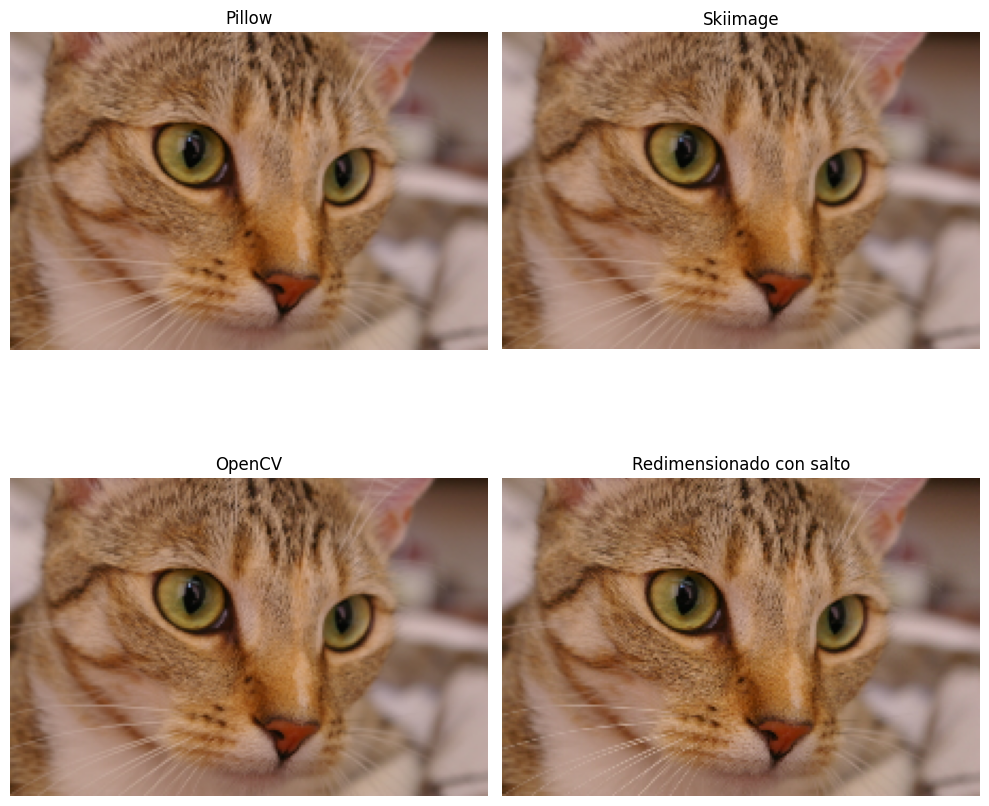


--- Porcentaje de remuestreo: 25 ---
tamaño original: (300, 451, 3)
tamaño redimensionado con pillow: (112, 75)
tamaño redimensionado con skimage: (75, 113, 3)
tamaño redimensionado con opencv: (75, 112, 3)
tamaño redimensionado con salto: (75, 112, 3)


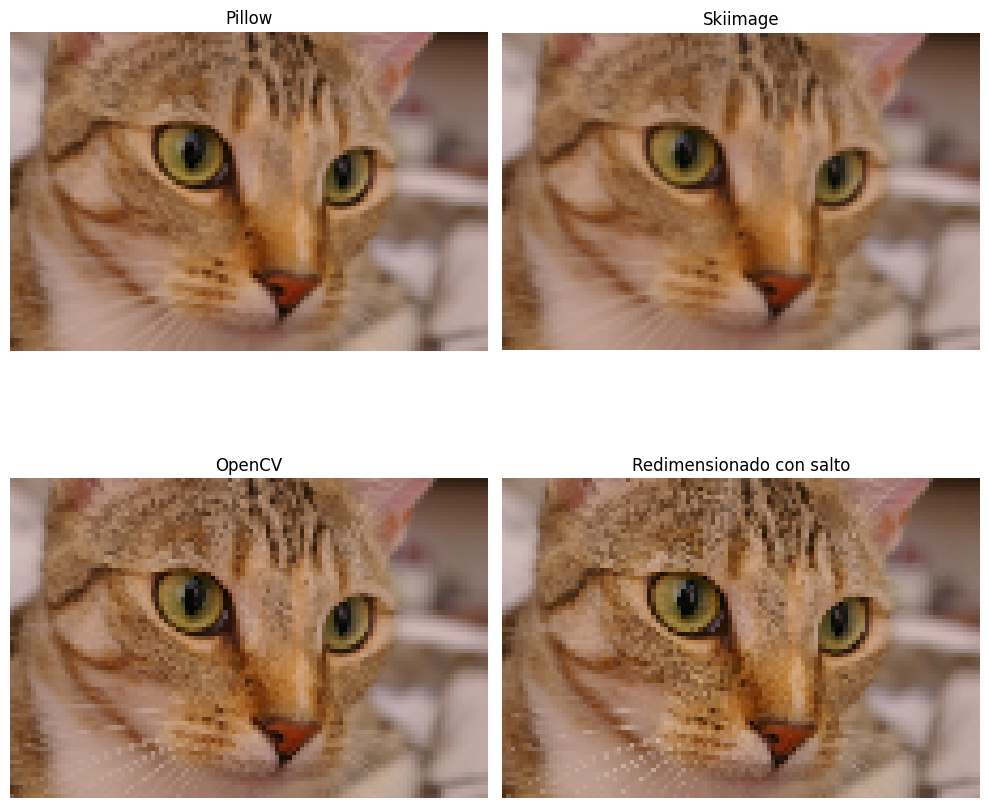


--- Porcentaje de remuestreo: 15 ---
tamaño original: (300, 451, 3)
tamaño redimensionado con pillow: (67, 45)
tamaño redimensionado con skimage: (45, 68, 3)
tamaño redimensionado con opencv: (45, 67, 3)
tamaño redimensionado con salto: (50, 75, 3)


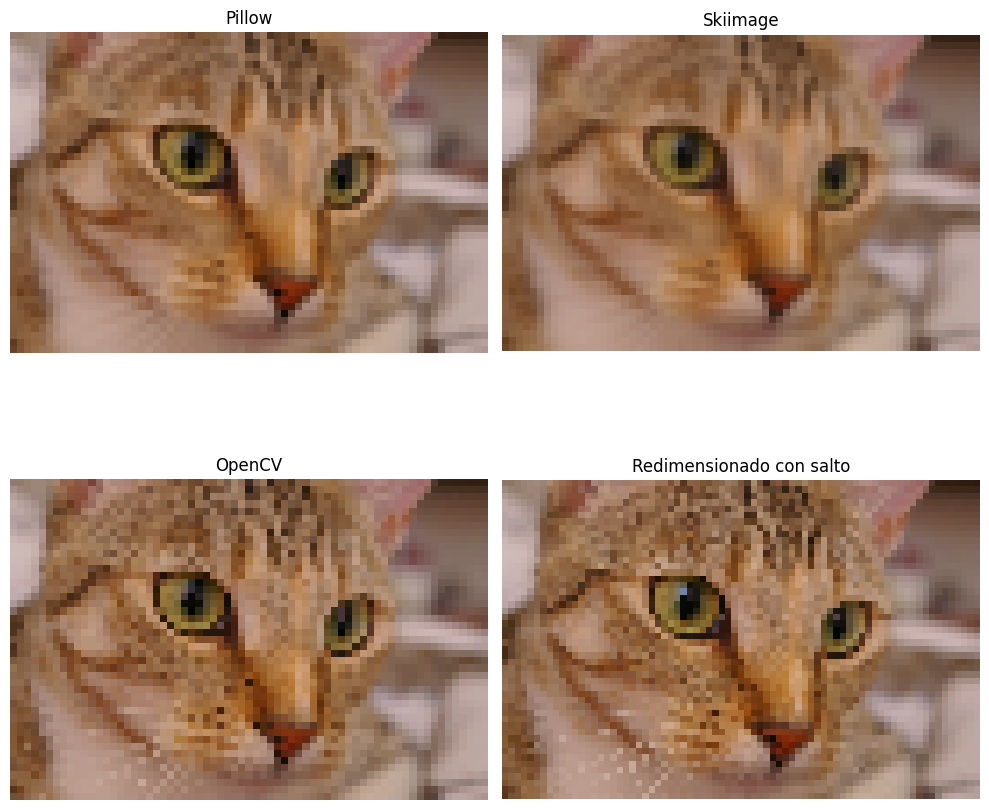


--- Porcentaje de remuestreo: 10 ---
tamaño original: (300, 451, 3)
tamaño redimensionado con pillow: (45, 30)
tamaño redimensionado con skimage: (30, 45, 3)
tamaño redimensionado con opencv: (30, 45, 3)
tamaño redimensionado con salto: (30, 45, 3)


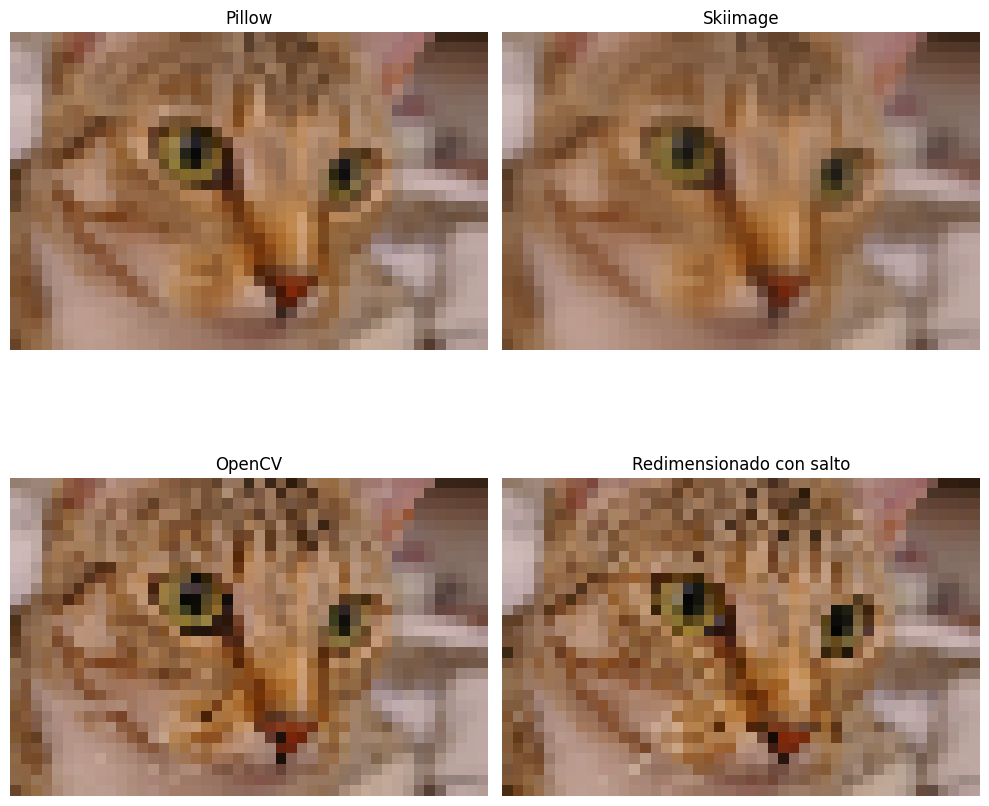

In [104]:
pocentajes=[50,25,15,10]
for porcentaje in pocentajes:

    image_resample_pillow = resample_pillow(PILImage.fromarray(cat_image), porcentaje)
    image_resample_skimage = resample_skimage(cat_image, porcentaje)
    imgen_rgb=cv2.cvtColor(opencv_image, cv2.COLOR_BGR2RGB)
    image_resample_opencv = resample_opencv(imgen_rgb, porcentaje)
    image_resample_redimensionar_con_salto = redimensionar_con_salto(imgen_rgb, porcentaje)

    print(f"\n--- Porcentaje de remuestreo: {porcentaje} ---")
    print(f"tamaño original: {cat_image.shape}")
    print(f"tamaño redimensionado con pillow: {image_resample_pillow.size}")
    print(f"tamaño redimensionado con skimage: {image_resample_skimage.shape}")
    print(f"tamaño redimensionado con opencv: {image_resample_opencv.shape}")
    print(f"tamaño redimensionado con salto: {image_resample_redimensionar_con_salto.shape}")

    fig, axes = plt.subplots(2, 2, figsize=(10, 10))
    # Pillow
    axes[0, 0].imshow(image_resample_pillow)
    axes[0, 0].set_title("Pillow")
    axes[0, 0].axis('off')

    # Skimage
    axes[0, 1].imshow(image_resample_skimage)
    axes[0, 1].set_title("Skiimage")
    axes[0, 1].axis('off')

    # OpenCV
    axes[1, 0].imshow(image_resample_opencv)
    axes[1, 0].set_title("OpenCV")
    axes[1, 0].axis('off')

    # Redimensionado con salto
    axes[1, 1].imshow(image_resample_redimensionar_con_salto)
    axes[1, 1].set_title("Redimensionado con salto")
    axes[1, 1].axis('off')

    plt.tight_layout()
    plt.show()
